# Credit Score Prediction

The neural network architecture built for the task of predicting "credit score" consists of a sequence of connected Dense layers, interspersed with Batch Normalization layers and dropout to prevent overfitting.

I opted for the classic funnel approach, starting with a dense layer of 512 neurons, decreasing the number in subsequent layers until reaching an output layer with 3 neurons, using the softmax activation function, which is ideal for multiclass classification. Dropout layers with rates of 0.3 and 0.2 are strategically positioned to reduce the model's complexity and generalize better over new or unseen data.

Predicting Credit Score is crucial in the financial sector, especially for institutions that offer credit products, such as banks and finance companies. A well-trained model for this purpose can help identify the credit risk of a potential loan borrower quickly and efficiently. By predicting the credit score, institutions can make more informed decisions about granting credit, setting appropriate credit limits, interest rates compatible with the risk, and payment terms that minimize the risk of default.

The code developed by this author is intended for academic use, and some sections have been purposefully expanded to enhance learning. Always remember to improve everything you have learned from this example.

I hope this has been helpful.

**Rhedson Esashika.**\
instragram: @rhedson\
linkedin: /esashika

---



A arquitetura da rede neural construída para a tarefa de predição de "credit score" (pontuação de crédito) consiste em uma sequência de camadas de** Dense layers** conectadas, que são intercaladas com *camadas de normalização em lote* (Batch Normalization) e dropout para evitar o overfitting.

Optei por realizar a abordagem clássica de *funil*, começando com uma camada densa de 512 neurônios, reduzindo o número em camadas subsequentes até chegar a uma **camada de saída** com 3 neurônios. usando a **função de ativação softmax**, ideal para classificação multiclasse. As camadas de dropout com taxas de 0.3 e 0.2 são estrategicamente posicionadas para reduzir a complexidade do modelo e generalizar melhor sobre dados novos ou não vistos.

A predição de Credit Score é crucial no setor financeiro, principalmente para instituições que oferecem produtos de crédito, como bancos e financeiras. Um modelo bem treinado para essa finalidade pode ajudar a identificar o risco de crédito de um potencial tomador de empréstimos de maneira rápida e eficiente. Ao prever a pontuação de crédito, as instituições podem tomar decisões mais informadas sobre a concessão de crédito, definindo limites de crédito adequados, taxas de juros compatíveis com o risco e termos de pagamento que minimizam o risco de inadimplência.

O código desenvolvido por este autor tem por finalidade uma aplicação acadêmica, alguns trechos foram expandidos propositalmente para melhorar o aprendizado. Não esqueça de sempre aprimorar tudo o que aprendeu neste exemplo.

Espero ter ajudado.

**Rhedson Esashika.**\
instragram: @rhedson\
linkedin: /esashika

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#--------------------
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Dataset

| **Field Name**                 | **Description**                                                              | **Description PT-BR**                                                   |
|----------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------|
| ID                         | A unique identifier for the individual.                                  | Um identificador único para o indivíduo.                            |
| Customer_ID                | Customer identification number.                                          | Número de identificação do cliente.                                 |
| Month                      | The month in which the data was obtained.                                | O mês em que os dados foram obtidos.                                |
| Name                       | Name of the customer.                                                    | Nome do cliente.                                                    |
| Age                        | Age of the customer.                                                     | Idade do cliente.                                                   |
| Occupation                 | Occupation of the customer.                                              | Ocupação do cliente.                                                |
| Annual_Income              | The Annual Income of the person.                                         | Renda anual da pessoa.                                              |
| Monthly_Inhand_Salary      | Monthly in-hand salary of the person.                                    | Salário mensal recebido pela pessoa.                                |
| Num_Bank_Accounts          | The number of bank accounts of the person.                               | Número de contas bancárias da pessoa.                               |
| Num_Credit_Card            | Number of credit cards the person is having.                             | Número de cartões de crédito que a pessoa possui.                   |
| Interest_Rate              | The interest rate on the credit card of the person.                      | A taxa de juros no cartão de crédito da pessoa.                     |
| Num_of_Loan                | The number of loans taken by the person from the bank.                   | Número de empréstimos que a pessoa possui junto ao banco.           |
| Type_of_Loan               | The types of loans taken by the person from the bank.                    | Os tipos de empréstimos que a pessoa tomou do banco.                |
| Delay_from_due_date        | The average number of days delayed by the person from the date of payment.| O número médio de dias de atraso da pessoa na data de pagamento.    |
| Num_of_Delayed_Payment     | Number of payments delayed by the person.                                | Número de pagamentos atrasados pela pessoa.                         |
| Changed_Credit_Card        | The percentage change in the credit card limit of the person.            | A porcentagem de alteração no limite do cartão de crédito da pessoa.|
| Num_Credit_Inquiries       | The number of credit card inquiries by the person.                       | Número de consultas de cartão de crédito feitas pela pessoa.        |
| Credit_Mix                 | Classification of Credit Mix of the customer.                            | Classificação do mix de crédito do cliente.                         |
| Outstanding_Debt           | The outstanding balance of the person.                                   | O saldo devedor da pessoa.                                          |
| Credit_Utilization_Ratio   | The credit utilization ratio of the credit card of the customer.         | A taxa de utilização de crédito do cartão de crédito do cliente.    |
| Credit_History_Age         | The age of the credit history of the person.                             | A idade do histórico de crédito da pessoa.                          |
| Payment_of_Min_Amount      | Yes if the person paid the minimum amount to be paid only, otherwise no. | Sim, se a pessoa pagou apenas o valor mínimo devido, caso contrário, não. |
| Total_EMI_per_month        | The total EMI per month of the person.                                   | O total de EMI mensal da pessoa.                                    |
| Amount_invested_monthly    | The monthly amount invested by the person.                               | O valor mensal investido pela pessoa.                               |
| Payment_Behaviour          | The payment behaviour of the person.                                     | O comportamento de pagamento da pessoa.                             |
| Monthly_Balance            | The monthly balance left in the account of the person.                   | O saldo mensal restante na conta da pessoa.                         |
| Credit_Score               | The credit score of the person.                                          | A pontuação de crédito da pessoa.                                   |


In [2]:
df = pd.read_csv("./train.csv")
train = df.copy()

In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x25fb6,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,20867.67,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Data PreProcessing

## Age, Num_of_Loan, Num_of_Delayed_Payment

| Operation                  | Description (EN)                                                                                     | Description (PT-BR)                                                                                       |
|----------------------------|------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| `fillna('0')`              | Replaces all `NaN` values in the column with '0', avoiding null issues in subsequent operations.      | Substitui todos os valores `NaN` na coluna por '0', evitando problemas de nulos em operações subsequentes.|
| `str.extract('(\d+)')`     | Extracts the first sequence of digits from the column. The regex `(\d+)` matches digits.              | Extrai a primeira sequência de dígitos da coluna. A expressão regular `(\d+)` corresponde a dígitos.      |
| `astype(float)`            | Converts the extracted values to `float`. Necessary before converting to `int`.                       | Converte os valores extraídos para `float`. Necessário antes de converter para `int`.                     |
| `astype(int)`              | Converts values from `float` to `int`, resulting in integers in the column.                           | Converte os valores de `float` para `int`, resultando em inteiros na coluna.                              |


In [6]:
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

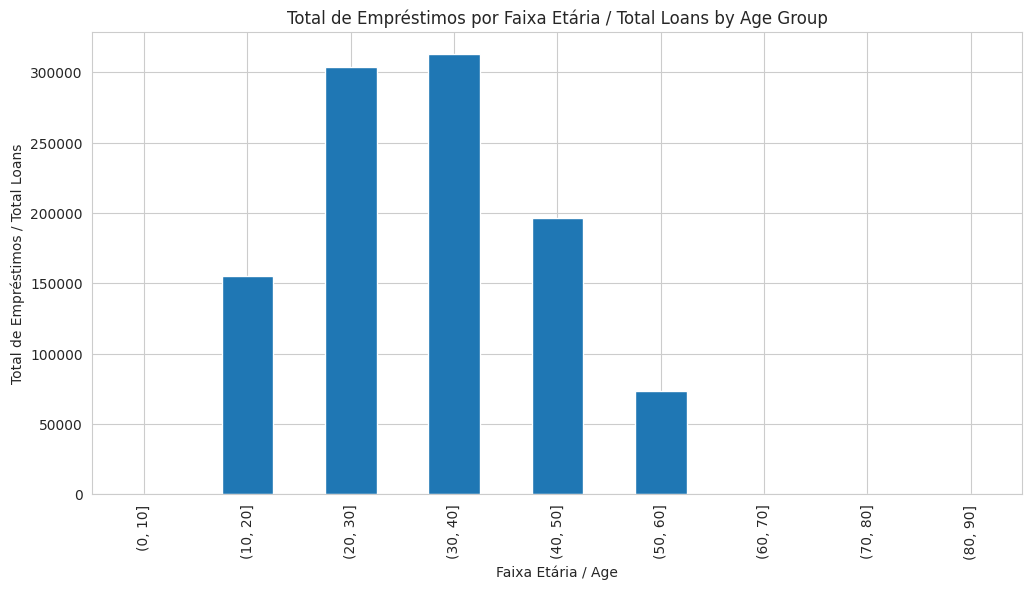

In [7]:
age_loan = train.groupby(pd.cut(train['Age'], bins=range(0, 100, 10)))['Num_of_Loan'].sum()
age_loan.plot(kind='bar')
plt.title('Total de Empréstimos por Faixa Etária / Total Loans by Age Group')
plt.xlabel('Faixa Etária / Age')
plt.ylabel('Total de Empréstimos / Total Loans')
plt.show()

In [8]:
# Define age categories and their corresponding labels
age_bins = [0, 12, 20, 30, 40, 50, 100]
age_labels = ['Child', 'Teen', 'Young_Adult', 'Middle_Age', 'Senior_Adult', 'Old']

# Categorize 'Age' into 'Age_Category' using defined bins and labels
train['Age_Category'] = pd.cut(
    train['Age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

# Optional: Uncomment the line below to remove the 'Age' column from the DataFrame
# train.drop(columns=['Age'], inplace=True)

train.Age_Category.unique()

['Young_Adult', NaN, 'Middle_Age', 'Old', 'Senior_Adult', 'Teen']
Categories (6, object): ['Child' < 'Teen' < 'Young_Adult' < 'Middle_Age' < 'Senior_Adult' < 'Old']

## Annual Income

In [9]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

## Credit Limit

In [10]:
train['Changed_Credit_Limit'] = (
    train['Changed_Credit_Limit']
    .replace('_', np.nan)  # Replace placeholders with NaN
    .pipe(pd.to_numeric, errors='coerce')  # Convert all entries to numeric, coercing errors to NaN
    .fillna(0)  # Replace all NaN values with 0
)

## Outstanding Debt

In [11]:
# Process the 'Outstanding_Debt' column to ensure all entries are numeric, replacing non-numeric characters and handling missing data.
train['Outstanding_Debt'] = (
    train['Outstanding_Debt']
    .astype(str)  # Ensure all data is in string format for manipulation
    .str.replace(r'[^0-9.]', '', regex=True)  # Remove any character that is not a digit or a period
    .pipe(pd.to_numeric, errors='coerce')  # Convert string values to numeric, turning errors into NaN
    .fillna(0)  # Replace any NaN values with 0
)

## Invested Monthly

In [12]:
# Clean and convert 'Amount_invested_monthly' to numeric values, handling empty strings and non-numeric characters.
train['Amount_invested_monthly'] = (
    train['Amount_invested_monthly']
    .astype(str)  # Convert all entries to string to ensure uniformity for replacements.
    .replace('', '0')  # Replace empty strings with '0' to avoid conversion errors.
    .str.replace(r'[^0-9.]', '', regex=True)  # Remove any non-numeric characters, keeping only digits and decimal points.
    .pipe(pd.to_numeric, errors='coerce')  # Convert the cleaned strings to numeric values, coercing any errors to NaN.
    .fillna(0)  # Replace any resulting NaN values with 0 to maintain numeric integrity.
)

## Monthly Balance

In [13]:
# Clean and convert 'Monthly_Balance' to numeric values, handling non-numeric characters and missing data.
train['Monthly_Balance'] = (
    train['Monthly_Balance']
    .astype(str)  # Ensure all data is in string format for manipulation.
    .str.replace(r'[^0-9.-]+', '', regex=True)  # Remove non-numeric characters except for decimal point and minus sign.
    .pipe(pd.to_numeric, errors='coerce')  # Convert cleaned strings to numeric, turning unconvertible values into NaN.
    .fillna(0)  # Replace any NaN values with 0 to ensure data integrity.
)

## Credit History Age

In [14]:
def parse_years_and_months(age):
    """
    Parse a string indicating age in the format "X Years and Y Months" to a total number of months.

    Args:
    age (str): A string representing the age in years and months.

    Returns:
    int: Total age in months.
    """
    if isinstance(age, str):
        try:
            # Initialize years and months
            years, months = 0, 0

            # Check and extract years part
            if 'Years' in age:
                parts = age.split(' Years and ')
                years = int(parts[0])

            # Check and extract months part
            if 'Months' in age:
                months = int(age.split(' Months')[0].split(' and ')[-1])

            # Calculate total months
            return years * 12 + months
        except (ValueError, IndexError):
            return 0  # Return 0 if there's any error in parsing
    else:
        return 0  # Non-string input returns 0

# Applying the function to the DataFrame
train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

## Duplicate Values

In [15]:
# Count the number of duplicate rows in the DataFrame
num_duplicates = train.duplicated().sum()

# Output the result, using f-string for more readable Python code
if num_duplicates == 0:
    print("There are no duplicates / Não há duplicadas")
else:
    print(f"There are {num_duplicates} duplicates.")


There are no duplicates / Não há duplicadas


In [16]:
total_missing_values = train.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values")
else:
    print("Total missing values:", total_missing_values)

Total missing values: 50167


In [17]:
train.isnull().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                          9985
Age                              0
SSN                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Age_Category        

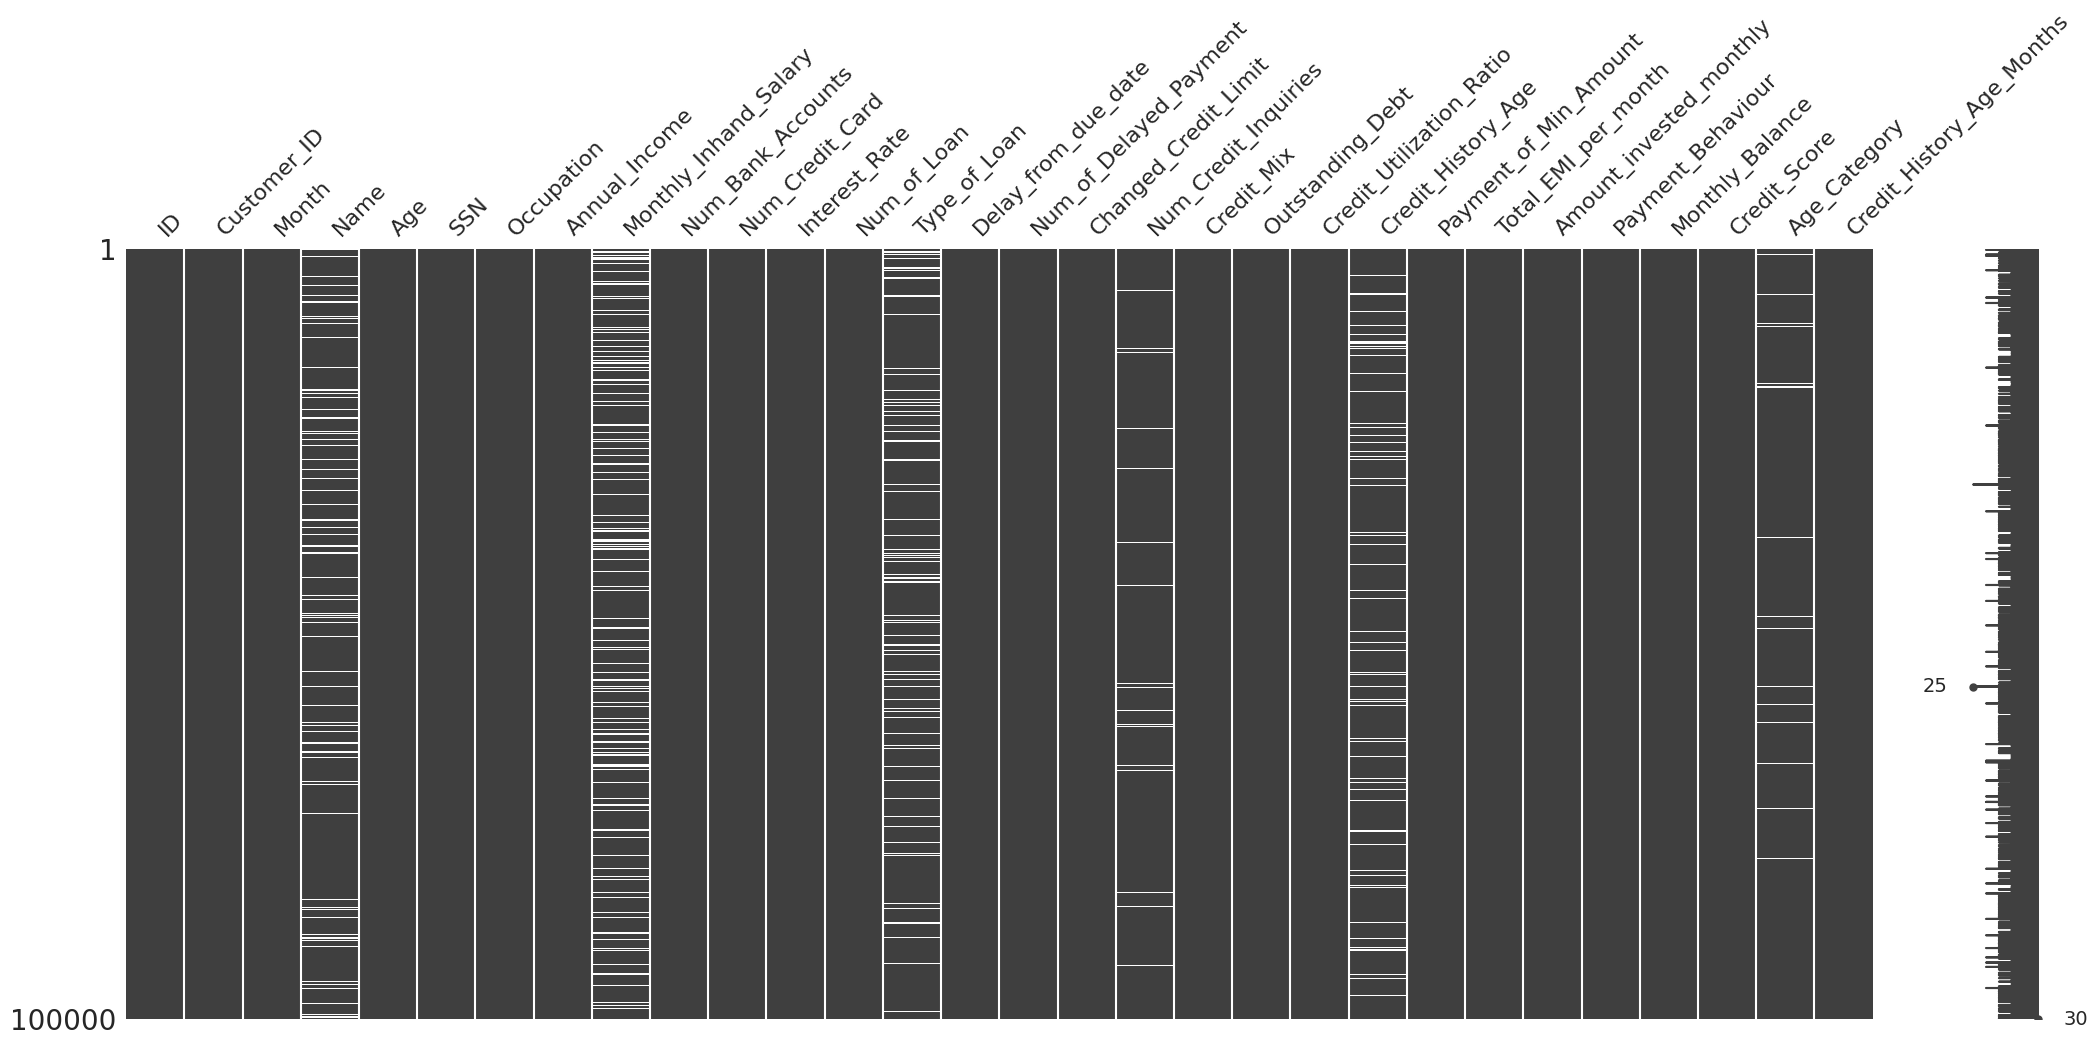

In [18]:
import missingno as msno
msno.matrix(train);

In [19]:
train.Monthly_Inhand_Salary.fillna(train.Monthly_Inhand_Salary.mean(),inplace = True)
train.Monthly_Inhand_Salary.isnull().sum()
train.Monthly_Inhand_Salary.fillna("bfill",inplace = True)
train.Monthly_Inhand_Salary.fillna("ffill",inplace = True)
train.Num_Credit_Inquiries.fillna(train.Num_Credit_Inquiries.mean(), inplace=True)
train.Credit_History_Age.fillna("bfill",inplace=True)
train.Credit_History_Age.fillna("ffill",inplace=True)

In [20]:
# dropping unnecessary columns for modelling
train = train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan',
             'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis=1)

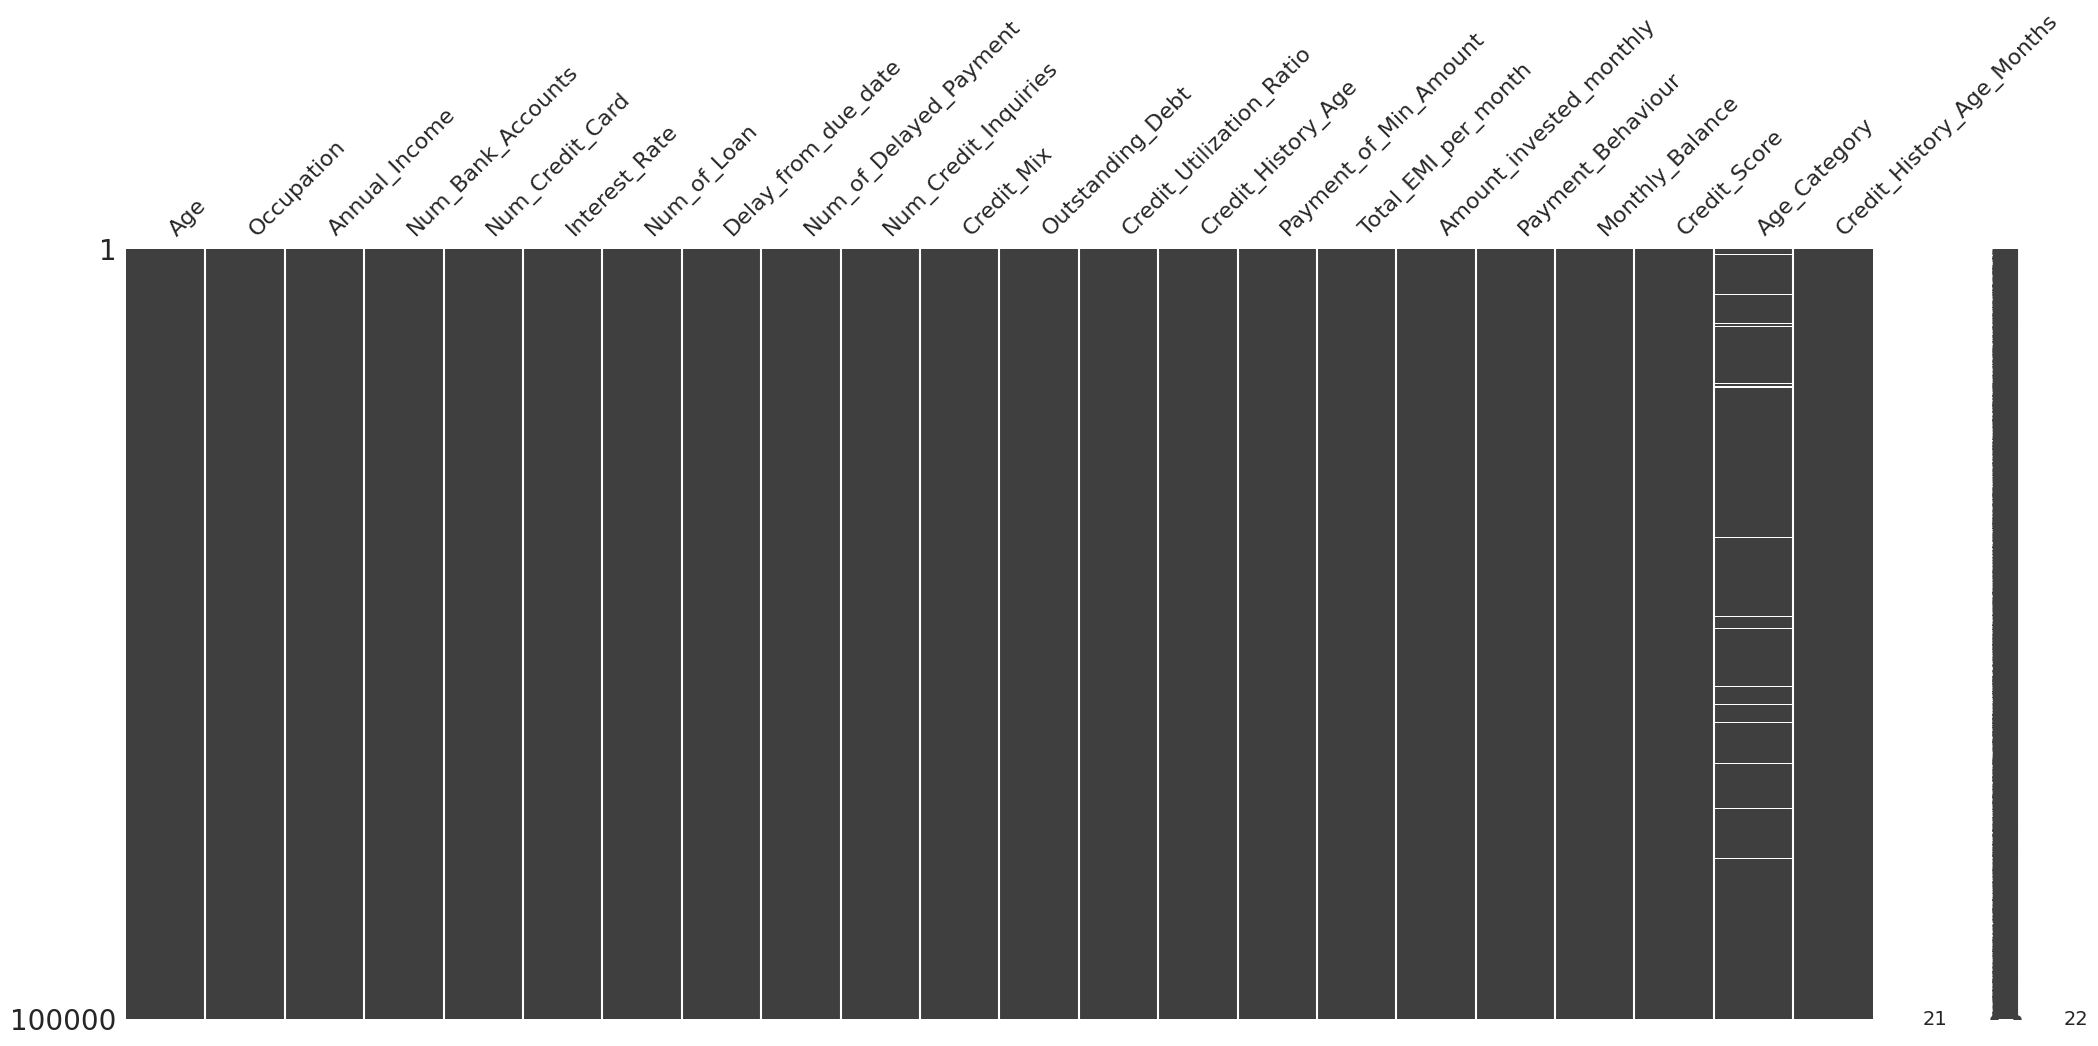

In [21]:
msno.matrix(train);

In [22]:
train.dropna(inplace=True)
train.isnull().sum().sum()

0

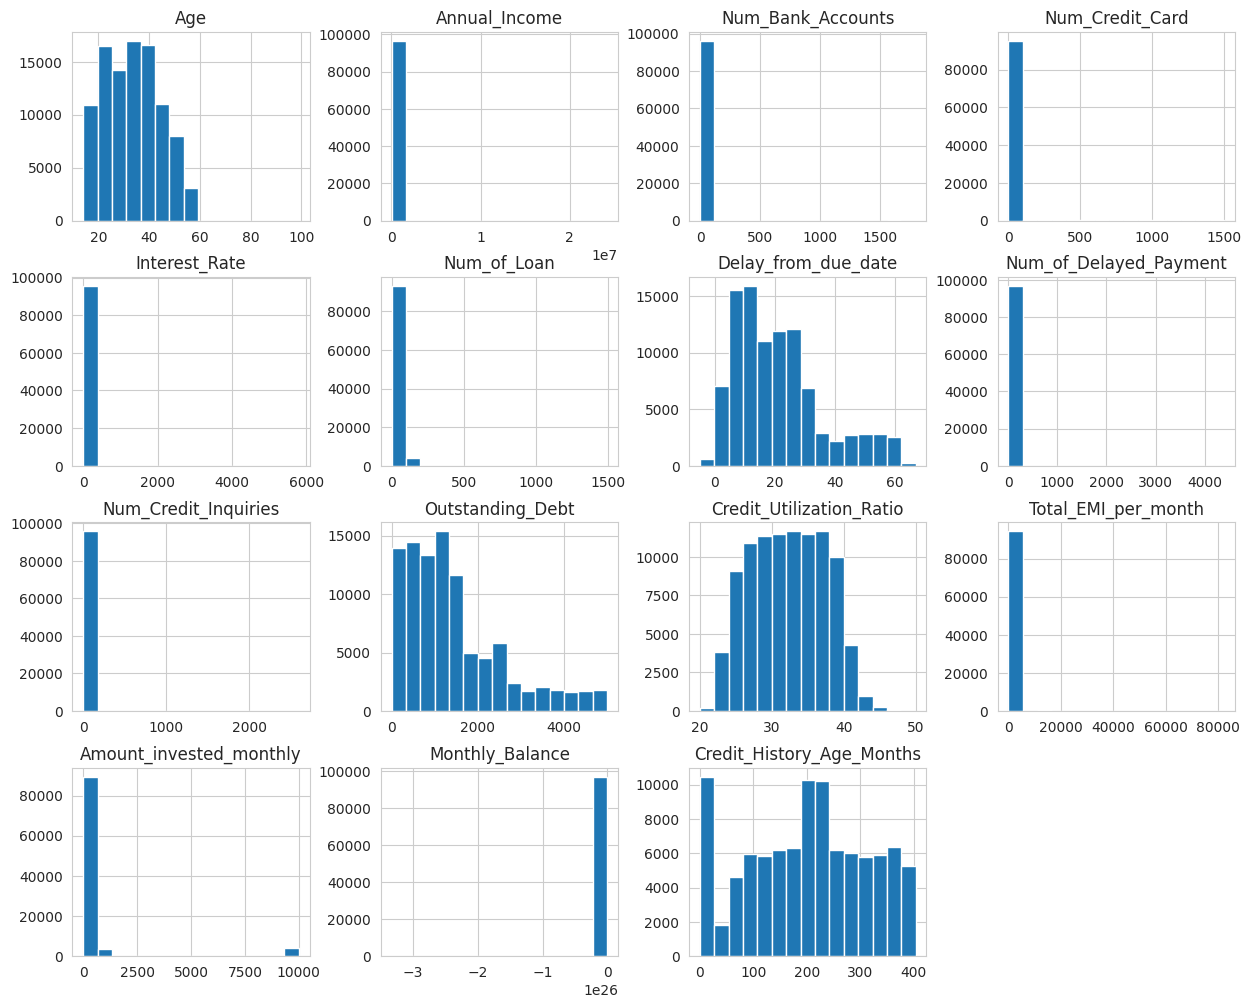

In [23]:
train.hist(figsize=(15, 12), bins=15);

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97223 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        97223 non-null  int64   
 1   Occupation                 97223 non-null  object  
 2   Annual_Income              97223 non-null  float64 
 3   Num_Bank_Accounts          97223 non-null  int64   
 4   Num_Credit_Card            97223 non-null  int64   
 5   Interest_Rate              97223 non-null  int64   
 6   Num_of_Loan                97223 non-null  int64   
 7   Delay_from_due_date        97223 non-null  int64   
 8   Num_of_Delayed_Payment     97223 non-null  int64   
 9   Num_Credit_Inquiries       97223 non-null  float64 
 10  Credit_Mix                 97223 non-null  object  
 11  Outstanding_Debt           97223 non-null  float64 
 12  Credit_Utilization_Ratio   97223 non-null  float64 
 13  Credit_History_Age         97223 non

<Axes: >

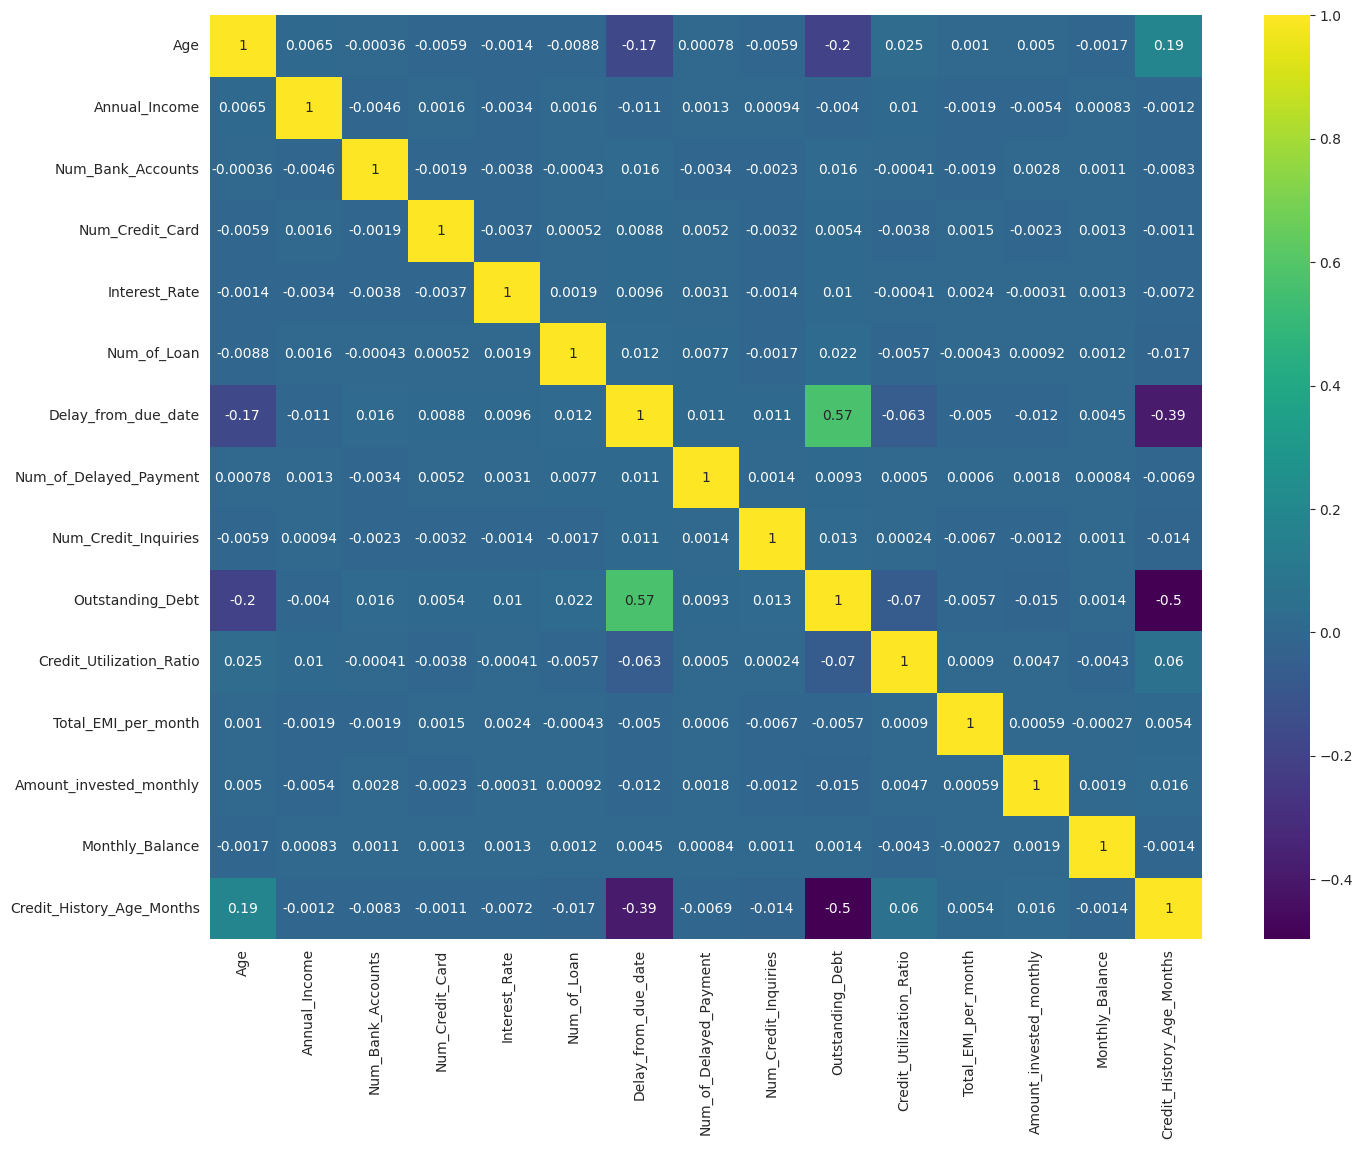

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(numeric_only= True), annot=True, cmap='viridis')

In [26]:
# Encoding Credit_Score
categories = ['Poor', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
train['Credit_Score'] = encoder.fit_transform(train[['Credit_Score']])

In [27]:
train.Age_Category

0        Young_Adult
1        Young_Adult
3        Young_Adult
4        Young_Adult
5        Young_Adult
            ...     
99995    Young_Adult
99996    Young_Adult
99997    Young_Adult
99998    Young_Adult
99999    Young_Adult
Name: Age_Category, Length: 97223, dtype: category
Categories (6, object): ['Child' < 'Teen' < 'Young_Adult' < 'Middle_Age' < 'Senior_Adult' < 'Old']

In [28]:
train = train.drop(['Age_Category'],axis=1) # let's delete this and try entering it with model Age

In [29]:
train = pd.get_dummies(train, drop_first=True)
train.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Credit_History_Age_9 Years and 9 Months,Credit_History_Age_bfill,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.120,3,4,3,4,3,7,4.000,809.980,...,False,False,True,False,False,False,True,False,False,False
1,23,19114.120,3,4,3,4,-1,0,4.000,809.980,...,False,True,True,False,False,False,False,True,False,False
3,23,19114.120,3,4,3,4,5,4,4.000,809.980,...,False,False,True,False,False,False,False,False,False,True
4,23,19114.120,3,4,3,4,6,0,4.000,809.980,...,False,False,True,False,False,True,False,False,False,False
5,23,19114.120,3,4,3,4,8,4,4.000,809.980,...,False,False,True,False,False,False,False,False,False,False


In [30]:
X =train.drop('Credit_Score', axis=1)
y = train['Credit_Score'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[2.35294118e-01, 4.05207196e-04, 5.55864369e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.52941176e-01, 2.86823154e-03, 1.11172874e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.47058824e-01, 4.46854365e-03, 3.33518621e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.05882353e-02, 3.86905804e-04, 4.44691495e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.76470588e-01, 1.95440041e-03, 4.44691495e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.70588235e-01, 6.38572370e-04, 5.00277932e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [34]:
X_test

array([[1.41176471e-01, 5.74295846e-03, 5.55864369e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.41176471e-01, 5.32987686e-03, 2.22345748e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.05882353e-02, 2.89770483e-03, 2.22345748e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.47058824e-01, 5.39523366e-04, 6.11450806e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.94117647e-01, 1.50836284e-03, 3.89105058e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e-01, 4.71999071e-03, 1.11172874e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Modelling & Model Performance

In [35]:
X_train.shape

(87500, 445)

## Model Building

| Component                 | Description (EN)                                                                                          | Description (PT-BR)                                                                                        |
|---------------------------|-----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Sequential()**          | Initializes a linear stack of layers.                                                                     | Inicializa uma pilha linear de camadas.                                                                    |
| **Dense()**               | Fully connected layers with ReLU activation.                                                              | Camadas totalmente conectadas com ativação ReLU.                                                           |
| **BatchNormalization()**  | Normalizes the activations of the previous layer at each batch.                                           | Normaliza as ativações da camada anterior em cada lote.                                                    |
| **Dropout()**             | Sets a fraction of input units to 0 during training to prevent overfitting.                               | Define aleatoriamente uma fração das unidades de entrada para 0 para prevenir o overfitting.               |
| **Dense()** (Output Layer)| Final layer with softmax activation for multi-class classification.                                      | Camada final com ativação softmax para classificação multiclasse.                                          |
| **Adam()**                | Optimization algorithm with a specified learning rate, for handling sparse gradients.                     | Algoritmo de otimização com taxa de aprendizado especificada para lidar com gradientes esparsos.           |
| **compile()**             | Compiles the model with Adam optimizer, using `sparse_categorical_crossentropy` and `accuracy` metrics.  | Compila o modelo com o otimizador Adam, usando `sparse_categorical_crossentropy` e métrica `accuracy`.     |


In [36]:
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(BatchNormalization())

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(3, activation="softmax"))

## Model Compilation

In [37]:
opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=100)

history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=1000,
                    verbose=1,validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/1000
171/171 [==============================] - 10s 12ms/step - loss: 0.8471 - accuracy: 0.6022 - val_loss: 1.0593 - val_accuracy: 0.5206
Epoch 2/1000
171/171 [==============================] - 2s 10ms/step - loss: 0.7513 - accuracy: 0.6430 - val_loss: 0.8010 - val_accuracy: 0.6152
Epoch 3/1000
171/171 [==============================] - 2s 10ms/step - loss: 0.7391 - accuracy: 0.6490 - val_loss: 0.7443 - val_accuracy: 0.6472
Epoch 4/1000
171/171 [==============================] - 2s 14ms/step - loss: 0.7306 - accuracy: 0.6543 - val_loss: 0.7468 - val_accuracy: 0.6428
Epoch 5/1000
171/171 [==============================] - 2s 12ms/step - loss: 0.7234 - accuracy: 0.6582 - val_loss: 0.7598 - val_accuracy: 0.6478
Epoch 6/1000
171/171 [==============================] - 2s 10ms/step - loss: 0.7172 - accuracy: 0.6633 - val_loss: 0.7495 - val_accuracy: 0.6478
Epoch 7/1000
171/171 [==============================] - 2s 10ms/step - loss: 0.7059 - accuracy: 0.6694 - val_loss: 0.7636 - val_a

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               228352    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6


Accuracy during Training :
------------------------------------


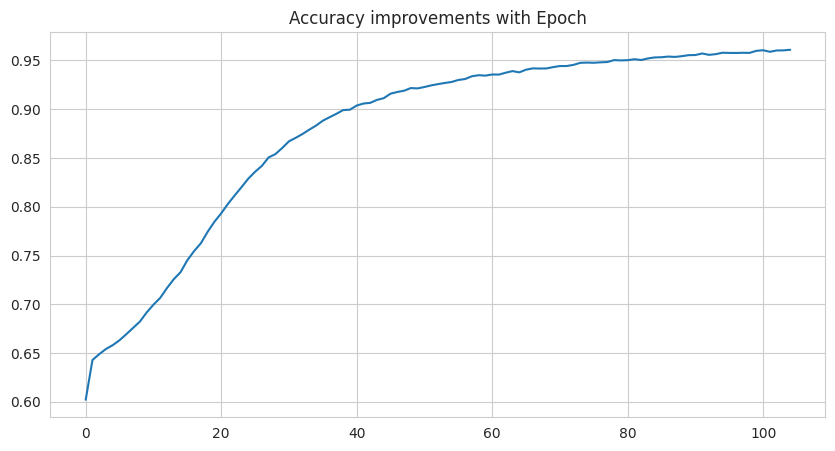

In [39]:
print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(model, X_train, y_train, X_test, y_test)

304/304 [==============================] - 1s 3ms/step
Test Set:
[[1565  976  280]
 [1156 3180  837]
 [ 166  635  928]]
              precision    recall  f1-score   support

         0.0       0.54      0.55      0.55      2821
         1.0       0.66      0.61      0.64      5173
         2.0       0.45      0.54      0.49      1729

    accuracy                           0.58      9723
   macro avg       0.55      0.57      0.56      9723
weighted avg       0.59      0.58      0.59      9723


Train Set:
[[25039   180   165]
 [  753 44861   936]
 [   56   116 15394]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     25384
         1.0       0.99      0.96      0.98     46550
         2.0       0.93      0.99      0.96     15566

    accuracy                           0.97     87500
   macro avg       0.97      0.98      0.97     87500
weighted avg       0.98      0.97      0.97     87500



In [42]:
# Saving the trained model to disk
model.save('credit-score-esashika-v1.h5')

In [43]:
!pip install pydot graphviz

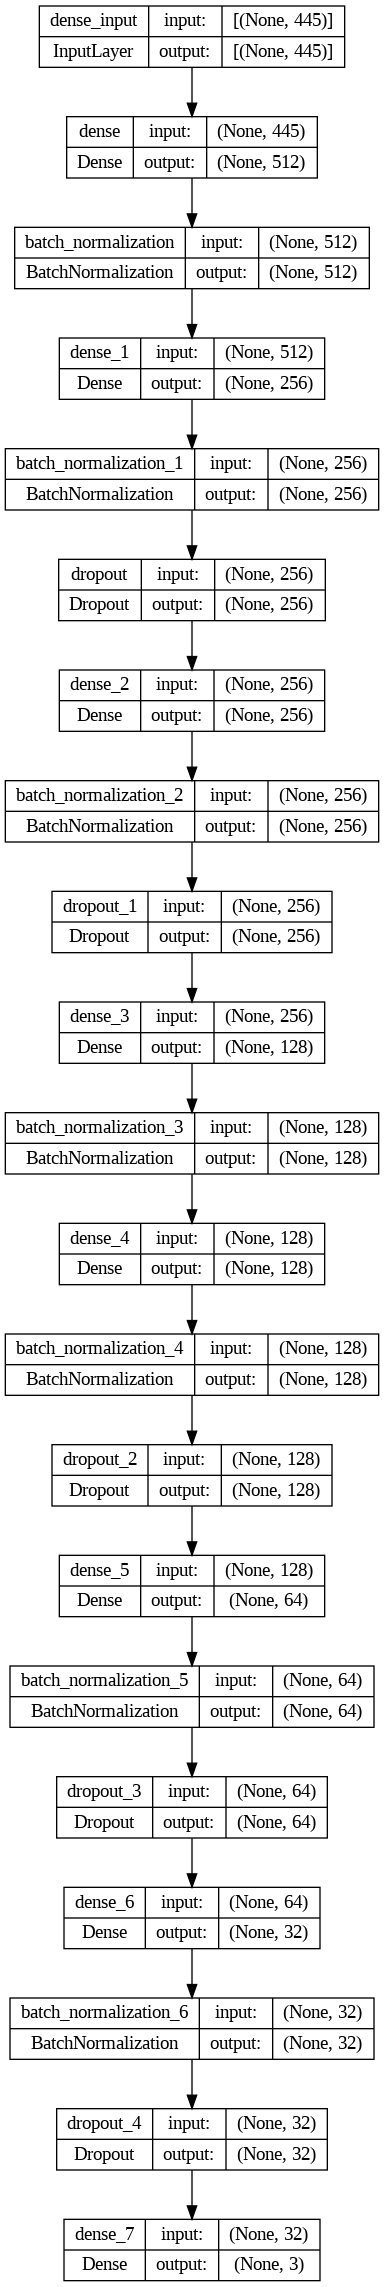

In [44]:
# Generating and saving the network architecture image
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [45]:
from tensorflow.keras.models import load_model
import numpy as np

#Load model
model = load_model('credit-score-esashika-v1.h5')
print("Model loaded successfully.")

Model loaded successfully.


In [46]:
# Load dataset predict test
X_new = np.random.random((20, X_test.shape[1]))
X_new

array([[0.80881873, 0.92404196, 0.62418049, ..., 0.1797287 , 0.89686498,
        0.38040399],
       [0.14025663, 0.16587319, 0.25480228, ..., 0.11001936, 0.97483105,
        0.36881425],
       [0.77017059, 0.32850132, 0.74164148, ..., 0.02748913, 0.85961759,
        0.05187408],
       ...,
       [0.39688446, 0.22669727, 0.30677733, ..., 0.61535389, 0.39921499,
        0.45709294],
       [0.52800555, 0.95547209, 0.88227724, ..., 0.09402769, 0.18088639,
        0.96902133],
       [0.36848855, 0.84091711, 0.75817371, ..., 0.52900024, 0.83093271,
        0.82628364]])

In [47]:
predictions = model.predict(X_new)

# Print Prediction
print("Predições:")
print(predictions)

1/1 [==============================] - 0s 178ms/step
Predições:
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
